# **Bootcamp Ciencia de Datos e Inteligencia Artificial**
# **Módulo 6. Procesamiento de lenguaje natural**
## **Semana 23. Análisis de sentimiento**

¡Hola! ¿Cómo te sientes hoy? Ojalá que tu respuesta sea "bien". ¿Te has preguntado cómo puede saber esto un modelo de inteligencia artificial?
Esta semana aprenderás sobre el análisis de sentimientos; dicho de otro modo, el modelo de inteligencia artificial aprenderá a analizarlos gracias a ti.

Revisa el contenido con especial atención, haz tu copia y comienza a practicar. De esa manera surgirán dudas que podrás resolver con tu *coach* el día de tu clase.

# Introducción al Análisis de sentimientos

El análisis de sentimientos es una minería contextual de texto que identifica y extrae información subjetiva en el material de origen. Esto ayuda a las empresas a comprender el sentimiento social de su marca, producto o servicio mientras monitorea las conversaciones en línea; no obstante, examinar los flujos de redes sociales se restringe al estudio básico de sentimientos y métricas basadas en conteo. Por lo anterior, se queda simplemente en la superficie y se pierden valiosos conocimientos. Entonces, ¿qué debe hacer una marca para sacar el mayor provecho de este tipo de análisis?

Para realmente analizar los sentimientos a partir del texto es importante conocer los siguientes conceptos básicos:

## Análisis de sentimiento

El análisis de sentimiento es la herramienta de clasificación de texto más común. Esta utiliza un mensaje entrante y determina si el sentimiento subyacente es positivo, negativo o neutral. Para probarla, puedes escribir una oración y medir el sentimiento subyacente con la demostración que se encuentra [en el siguiente enlace](https://komprehend.io/sentiment-analysis).

El análisis de sentimiento se utiliza con frecuencia en las redes sociales, empresas de todo tipo y en las noticias para conocer el impacto que tienen las notas en las personas.

Ahora es momento de llevar este proceso al código. Para hacerlo, se utilizará un dataset de reviews sobre alimentos en Amazon: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?select=Reviews.csv


## Paso 1: El análisis
Primero, se leen los datos:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Ucamp/Reviews.csv')
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

A continuación, se determina si el dataset requiere una limpieza:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


Al parecer, existen datos nulos en las columnas "Summary" y "ProfileName". Debido al volumen del dataset y dado que se trata de texto que no puede completarse con media, lo correcto es eliminar dichas columnas.

In [ ]:
# Eliminamos los registros que tengan por lo menos un valor NaN o nulo en una columna
df = df.dropna()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


Los datos que se utilizarán con mayor recurrencia para este análisis son "Resumen", "Texto" y "Puntuación".

Texto: esta variable contiene la información completa de revisión del producto.

Resumen: este es un resumen de toda la revisión.

Puntuación: la calificación del producto proporcionada por el cliente.

Ahora, se revisa la variable "Puntuación" para conocer si las valoraciones de los clientes son positivas o negativas.



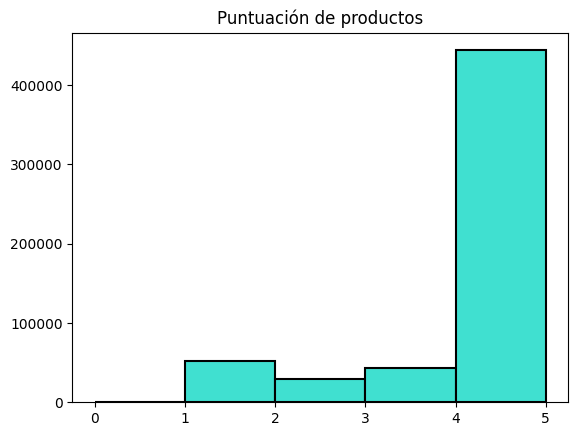

In [ ]:
# Importamos las bibliotecas
import matplotlib.pyplot as plt


# Generamos un histograma con las puntuaciones de los productos
plt.hist(df['Score'], color="turquoise",ec="black", lw=1.5, bins=[0,1,2,3,4,5])
plt.title("Puntuación de productos")
plt.show()

Es posible notar que la mayoría de las calificaciones de los clientes tiene una valoración positiva. En consecuencia, cabría suponer que la mayoría de las críticas también lo son; para constatarlo, se crean algunas nubes de palabras con el propósito de obtener las más utilizadas en las reseñas.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


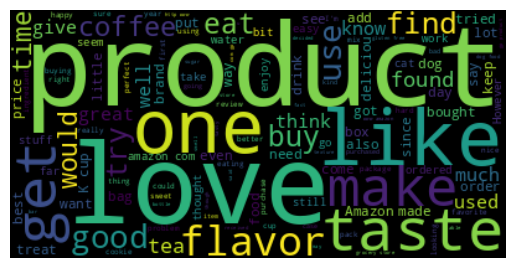

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud


# Creamos una lista de palabras de parada
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

Algunas palabras populares son "sabor", "producto", "amor" y "café". Estos términos tienen una valoración positiva, lo cual indica que la mayoría de las revisiones en el conjunto de datos expresan un sentimiento positivo.



## Paso 2: Clasificación de tweets

En este paso, se clasifican las reseñas en "positivas" y "negativas" para utilizarlas como datos de entrenamiento para el modelo de clasificación de opiniones.

Las críticas positivas se catalogan como +1 y las críticas negativas, como -1.

Todas las reseñas se clasifican con la 'Puntuación' > 3 se señalan como +1, lo que demuestra que son positivas.

Todas las reseñas con 'Puntuación' < 3 se catalogan como -1. Las reseñas con 'Puntuación' = 3 se eliminarán porque son neutrales y no forman parte de los proósitos del entrenamiento del modelo.


In [ ]:
# asignamos reseñas con puntuación > 3 como opinión positiva
# puntuación < 3 opinión negativa
# eliminar puntuación = 3


df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)

<ipython-input-8-2ec17d052c38>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)


Ahora, existe una nueva columna llamada "Sentiment".

In [ ]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   sentiment  
0          1  
1         -1  
2          1  
3         -1  
4          1

## Paso 3: Más análisis de datos

Una vez clasificados los tweets en positivos y negativos, es momento de construir nubes de palabras para cada uno.

Primero, se crean dos marcos de datos: uno con todas las reseñas positivas y otro con todas las reseñas negativas.

In [ ]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

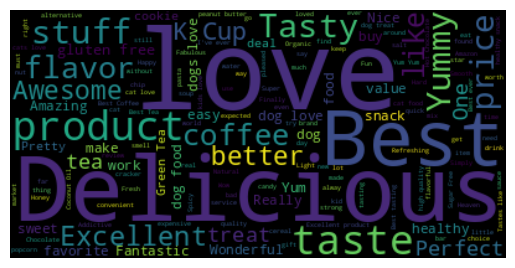

In [ ]:
# Nube de palabras de sentimientos positivos
stopwords = set(stopwords)
stopwords.update(["br", "href","good","great"])
## good y great son removidos porque son incluidos en sentimientos negativos también
pos = " ".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
negative.describe()

Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count   82007.000000          82007.000000            82007.000000   
mean   281732.941712              2.417659                4.222530   
std    163609.583877              8.222345                9.973231   
min         2.000000              0.000000                0.000000   
25%    140266.000000              0.000000                0.000000   
50%    281502.000000              1.000000                2.000000   
75%    421992.000000              2.000000                5.000000   
max    568451.000000            580.000000              593.000000   

              Score          Time  sentiment  
count  82007.000000  8.200700e+04    82007.0  
mean       1.362689  1.302463e+09       -1.0  
std        0.480779  4.374975e+07        0.0  
min        1.000000  9.482400e+08       -1.0  
25%        1.000000  1.285027e+09       -1.0  
50%        1.000000  1.316131e+09       -1.0  
75%        2.000000  1.334189e+09       -1.0  
max        2.000000  1.351210e+09       -1.0

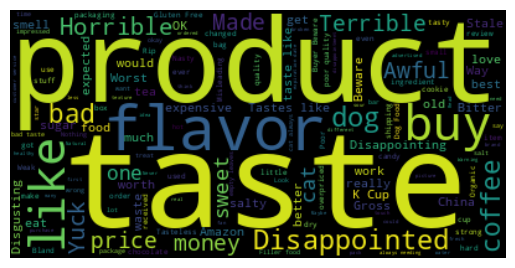

In [ ]:
# Nube de palabras de sentimientos negativos
neg = " ".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

La nube de palabras de sentimientos positivos estaba llena de palabras positivas, como "amor", "mejor" y "delicioso".

La nube de palabras de sentimiento negativo se llenó en su mayoría con palabras negativas, como "decepcionado" y "puaj" . ”

Las palabras  bueno" y "excelente" aparecieron inicialmente en la nube de palabras de sentimiento negativo, a pesar de ser palabras positivas. Esto probablemente se deba a que se usaron en un contexto negativo, como "no es bueno". Debido a esto, eliminé esas dos palabras de la nube de palabras.

Finalmente, podemos revisar a la distribución de opiniones con sentimiento en el conjunto de datos:



In [ ]:
# Graficamos las reviews positivas y las negativas
import plotly.express as px

df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Sentimientos por el producto')
fig.show()

Aquí podemos ver que los sentimeintos son mayoritariamente postivos en las reseñas.

## Paso 4: Construcción del modelo

Finalmente, se construye el modelo de análisis de sentimiento. Este tomará las reseñas como entrada; luego, arrojará una predicción sobre si cada una es positiva o negativa.

Esta es una tarea de clasificación, por tanto, requiere entrenar un modelo de regresión logística simple.

### Limpieza de datos

Los datos resumidos se utilizan para hacer predicciones. Primero, se eliminan todos los signos de puntuación de los datos.


In [ ]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

## Dividir o Split al dataset

El dataset solo debe tener dos columnas: "Sumary" (los datos del texto de revisión) y "Sentimiento" (la variable de destino).

In [ ]:
dfNew = df[['Summary','sentiment']]
dfNew.head()

Summary  sentiment
0  Good Quality Dog Food          1
1      Not as Advertised         -1
2    Delight says it all          1
3         Cough Medicine         -1
4            Great taffy          1

Ahora dividiremos el dataset en conjuntos de entrenamiento y prueba. El 80 % de los datos se utilizará para entrenamiento y el 20 % para pruebas.



In [ ]:
import numpy as np

index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

### Creamos una bolsa de palabras

Usaremos un vectorizador de conteo de la biblioteca Scikit-learn.

Esto transformará el texto en nuestro dataset en un modelo de bolsa de palabras, que contendrá una matriz dispersa de enteros. Se contará e imprimirá el número de ocurrencias de cada palabra.

Tendremos que convertir el texto en un modelo de bolsa de palabras ya que el algoritmo de regresión logística no puede entender el texto.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [ ]:
train_matrix

<414180x31563 sparse matrix of type '<class 'numpy.int64'>'
	with 1676177 stored elements in Compressed Sparse Row format>

In [ ]:
test_matrix

<111593x31563 sparse matrix of type '<class 'numpy.int64'>'
	with 447777 stored elements in Compressed Sparse Row format>

## Regresión logística

Aquí se incrementa el número de iteraciones `max_iter`, pues de no hacerlo, el entrenamiento arrojará un error.

Otra posible solución es estandarizar y escalar. Aquí puedes encontrar más información: https://scikit-learn.org/stable/modules/preprocessing.html

El desarrollo de paso se omitirá en este módulo debido a que se trata de algo que aprendiste a hacer con anterioridad.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

Hacemos la división de los datos en variables independientes

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

Entrenamos el modelo de predicción

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Hacemos algunas predicciones

In [ ]:
predictions = lr.predict(X_test)

print(X_test)

  (0, 1347)	1
  (0, 7856)	1
  (0, 14639)	1
  (0, 24183)	1
  (1, 6800)	1
  (1, 17399)	1
  (2, 12437)	1
  (2, 27304)	1
  (3, 2072)	2
  (3, 3845)	1
  (3, 10009)	1
  (3, 12140)	1
  (3, 12437)	1
  (3, 15121)	1
  (3, 27910)	1
  (4, 3147)	1
  (4, 4935)	1
  (4, 8196)	1
  (4, 11050)	2
  (4, 16545)	1
  (4, 18576)	1
  (4, 22942)	1
  (4, 27893)	1
  (4, 27932)	1
  (4, 28057)	1
  :	:
  (111585, 1452)	1
  (111585, 27170)	1
  (111586, 3782)	1
  (111586, 16325)	1
  (111587, 13953)	1
  (111587, 19136)	1
  (111587, 19810)	1
  (111587, 30406)	1
  (111589, 18321)	1
  (111589, 30185)	1
  (111590, 1579)	1
  (111590, 2541)	1
  (111590, 22358)	1
  (111590, 23823)	1
  (111590, 25327)	1
  (111591, 1579)	1
  (111591, 2549)	1
  (111591, 27905)	1
  (111591, 30817)	1
  (111592, 538)	1
  (111592, 3100)	1
  (111592, 5499)	1
  (111592, 11096)	1
  (111592, 25954)	1
  (111592, 29570)	1


## Paso 5 Pruebas

Para este momento, la precisión del modelo se somete a prueba.



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
new = np.asarray(y_test)
cf_matrix = confusion_matrix(predictions,y_test)
cf_matrix

array([[11430,  2330],
       [ 5875, 91958]])

<Axes: >

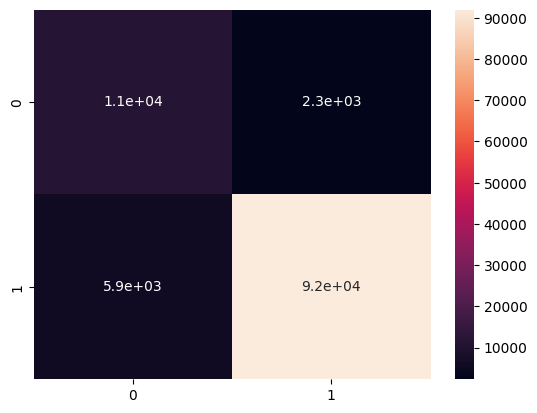

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.66      0.83      0.74     13760
           1       0.98      0.94      0.96     97833

    accuracy                           0.93    111593
   macro avg       0.82      0.89      0.85    111593
weighted avg       0.94      0.93      0.93    111593



La precisión general del modelo en los datos de prueba es de alrededor del 94 %, lo cual es bastante bueno teniendo en cuenta que no hicimos ninguna extracción de características ni mucho preprocesamiento.

Ahora hagamos una prueba de predicción con la siguiente reseña en inglés: "El producto fue muy malo"


In [ ]:
review_test = "The product was very bad"

# Debemos hacer que nuestro texto de test pase por el mismo proceso que todo el dataset de train
review_convert = vectorizer.transform([review_test])
prediction_test = lr.predict(review_convert)
prediction_test

array([-1])

Recuerda que el -1 lo asignamos para las reseñas negativas, por lo tanto, nuestro modelo acertó.

#### **Ponte a prueba 1**

**Objetivo:**  
Dado un conjunto de datos con opiniones de usuarios sobre productos, entrenar un modelo de clasificación para predecir el sentimiento de cada opinión como "positiva", "negativa" o "neutral".

**Conjunto de datos:**  
El conjunto de datos proporcionado, llamado `opiniones.csv`, contiene las siguientes columnas:

1. `id`: Identificador único de la opinión.
2. `comentario`: Texto de la opinión escrita por el usuario.
3. `sentimiento`: Clasificación del sentimiento de la opinión como "positiva", "negativa" o "neutral".

Puedes descargar el conjunto de datos en el siguiente enlace: https://drive.google.com/file/d/1qSVW33xd1mNQOEZkhYhfQgf0n8zT4dqO/view?usp=sharing

**Puntos a considerar:**  
1. Se debe dividir el conjunto de datos en datos de entrenamiento y prueba.
2. Utilizar técnicas de procesamiento de lenguaje natural para transformar el texto en características numéricas.
3. Entrenar un modelo de clasificación (puede ser un modelo de regresión logística, máquinas de soporte vectorial, entre otros) usando los datos de entrenamiento.
4. Evaluar el desempeño del modelo utilizando los datos de prueba.
5. Presentar métricas de desempeño como precisión, recall y F1-score.

#### **Ponte a prueba 2**

**Análisis de Sentimientos con Modelos de Aprendizaje Automático**

**Descripción:**

Utiliza un modelo de aprendizaje automático para predecir si una reseña es positiva o negativa basándote en su contenido. Para ello, deberás realizar las siguientes tareas:

1. Preprocesar el texto: limpiar, tokenizar y convertir las reseñas en vectores numéricos.
2. Dividir los datos en conjuntos de entrenamiento y prueba.
3. Entrenar un modelo de aprendizaje automático (puedes usar un modelo simple como Regresión Logística) para predecir el sentimiento de las reseñas.
4. Evaluar el rendimiento del modelo utilizando métricas adecuadas (por ejemplo, precisión, recall, F1-score).

**Datos de entrada:**

Un DataFrame `df` con las siguientes columnas:
- `Text`: Contiene el texto de las reseñas.
- `Sentiment`: Etiquetas de sentimiento, donde 1 indica positivo y 0 indica negativo.

**Código base:**

```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# TODO: Preprocesar el texto y preparar los datos
# TODO: Entrenar el modelo
# TODO: Evaluar el modelo
```

---

**Descripción del dataset:**

Uno de los datasets más conocidos para tareas de procesamiento de lenguaje natural es el dataset 20 newsgroups, que contiene mensajes de 20 grupos de noticias. Sin embargo, para simplificar la tarea y centrarnos en análisis de sentimientos, podemos binarizar las clases y tratarlo como un problema de clasificación binaria (por ejemplo, tomando dos categorías específicas y etiquetándolas como "positivo" y "negativo").

#### Código base


In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Cargar una versión reducida del dataset 20 newsgroups con solo dos categorías
categories = ['sci.space', 'talk.religion.misc']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Convertir a DataFrame y agregar etiquetas binarias
df_newsgroups = pd.DataFrame({'Text': newsgroups.data, 'Sentiment': newsgroups.target})

# Binarizar las etiquetas: 0 para 'sci.space' y 1 para 'talk.religion.misc'
df_newsgroups['Sentiment'] = df_newsgroups['Sentiment'].apply(lambda x: 0 if x == 0 else 1)

# Mostrar las primeras filas del DataFrame
df_newsgroups.head()

# Unirlo todo

¿Recuerdas que durante la semana 21 hiciste un preprocesamiento con reviews de IMDB? Ahora es tiempo de unirlo todo.

Este es el código de la Semana 21:


In [ ]:
# Obtenemos el dataset desde: http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2023-09-01 14:52:13--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  21.4MB/s    in 5.2s    

2023-09-01 14:52:18 (15.5 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [ ]:
# Extraemos los archivos descargados
!tar xvzf aclImdb_v1.tar.gz

Se truncaron las últimas líneas 5000 del resultado de transmisión.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclIm

In [ ]:
import os

# Función para obtener los datos desde los archivos
def fetch_reviews(path):
  data = []
  files = [f for f in os.listdir(path)]
  for file in files:
    with open(path+file, "r", encoding='utf8') as f:
      data.append(f.read())

  return data

In [ ]:
import pandas as pd

# Colocamos los datos en el dataframe
# Las críticas positivas se etiquetan como 1 y las negativas como 0.
df_train_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/train/pos/'), 'label': 1})
df_train_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/train/neg/'), 'label': 0})

df_test_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/test/pos/'), 'label': 1})
df_test_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/test/neg/'), 'label': 0})

# Fusionando todos los Data Frames para la limpieza y preprocesamiento de datos
df = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg], ignore_index=True)

print("Reviews totales en el DF: ", df.shape)
df.head()

Reviews totales en el DF:  (50000, 2)


review  label
0  This version of the Charles Dickens novel feat...      1
1  I know I should like this film, and I do for t...      1
2  Five Deadly Venoms is not as bloody and violen...      1
3  Each of the major studios cranked out jazzy on...      1
4  My family goes back to New Orleans late 1600's...      1

In [ ]:
# Comprobamos que no haya datos nulos.
df['review'].isnull().sum()

0

In [ ]:
# Número de palabras en la review
word_counts = df['review'].apply(lambda x: len(x.split()))

word_counts.describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review, dtype: float64

In [ ]:
import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # Definimos las palabras de Stop
stop_words.remove('not') # Eliminamos "NOT" de la lista stop_words ya que contiene valor en películas negativas
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):

  # Limpieza de datos
  review = re.sub(re.compile('<.*?>'), '', review) # Removemos tags HTML
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) # Tomamos solo las palabras

  # Convertimos a minúsculas
  review = review.lower()

  # Tokenización
  tokens = nltk.word_tokenize(review) # Convierte las reviews en tokens

  # Removemos las palabras de parada
  review = [word for word in tokens if word not in stop_words] # Removemos palabras de parada

  # Lematización
  review = [lemmatizer.lemmatize(word) for word in review]

  # Unimos las palabras
  review = ' '.join(review)

  return review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df['preprocessed_review'] = df['review'].apply(lambda review: data_preprocessing(review))
df.head()

review  label  \
0  This version of the Charles Dickens novel feat...      1   
1  I know I should like this film, and I do for t...      1   
2  Five Deadly Venoms is not as bloody and violen...      1   
3  Each of the major studios cranked out jazzy on...      1   
4  My family goes back to New Orleans late 1600's...      1   

                                 preprocessed_review  
0  version charles dickens novel feature george c...  
1  know like film part mentioned bit long tooth a...  
2  five deadly venom not bloody violent story ric...  
3  major studio cranked jazzy one reeler througho...  
4  family go back new orleans late 1600 early 170...

Este fue el avance de hace dos semanas. Ahora, para dividir los datos en entrenamiento y prueba se utiliza `train_test_split` de sklearn. En este caso, se emplea la estratificación de parámetros para tener una proporción igual de clases en cada categoría.

In [ ]:
from sklearn.model_selection import train_test_split

data = df.copy()
y = data['label'].values
data.drop(['label'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (35000, 2) (35000,)
Test data: (15000, 2) (15000,)


Enseguida se ejecuta la vectorización de los datos.

Para este ejemplo se utiliza min_df=10, debido a que solo se desean aquellas palabras que ocurren al menos 10 veces en todo el texto.

In [ ]:
# Aquí creamos nuestra bolsa de palabras o BOW
from sklearn.feature_extraction.text import CountVectorizer

# Con esta linea le indicamos al vectorizador que solo queremos las palabras con al menos 10 repeticiciones
vect = CountVectorizer(min_df=10)

X_train_review_bow = vect.fit_transform(X_train['preprocessed_review'])
X_test_review_bow = vect.transform(X_test['preprocessed_review'])

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (35000, 19550)
X_test_review_bow shape:  (15000, 19550)


Después, se ejecuta un proceso de TF-FDI *term frequency–inverse document frequency* o frecuencia de términos–frecuencia inversa del documento.

La **Frecuencia de terminos (TF)** es el número de veces que aparece una palabra en un documento dividido por el número total de palabras del texto. Cada documento tiene su propia frecuencia de término dada por la siguiente fórmula:
$$
tf_[i,j] = \dfrac{n_{i,j}}{\sum_{k} n_{i,j}}
$$

La **Frecuencia de datos inversa (IDF)** es el logaritmo del número de documentos dividido por el número de documentos que contienen la palabra $(w)$. La frecuencia de datos inversa determina el peso de las palabras raras en todos los documentos del texto.
$$
idf(w) = \log(\dfrac{N}{df_{t}})
$$

Por último, el TF-IDF es simplemente el TF multiplicado por el IDF.
$$
w_{i,j} = tf_{i,j} * \log(\dfrac{N}{df_{t}})
$$

En Python se efectúa de la siguiente manera:



In [ ]:
# Aquí creamos nuestro TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_review_tfidf = vectorizer.fit_transform(X_train['preprocessed_review'])
X_test_review_tfidf = vectorizer.transform(X_test['preprocessed_review'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (35000, 19550)
X_test_review_tfidf shape:  (15000, 19550)


Para crear el clasificador se aplicarán y compararán dos métodos para seleccionar aquel que otorgue mayor precisión.

Primero, se usa Naive Bayes con reviews codificadas en la "Bolsa de Palabras".



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow) # Predicciones del modelo
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8542666666666666


Naive Bayes con BOW brinda una precisión de 85.3%.

Ahora, se realiza una prueba con TF-IDF.

In [ ]:
clf = MultinomialNB(alpha=1)
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8604


TF-IDF ofrece resultados ligeramente mejores (86.02%) que BOW. Por esta razón, se selecciona TF-IDF para probarlo con un modelo lineal simple y regresión logística.

Los parámetros de LogisticRegression utilizados fueron los siguientes:

**penalty:** En este caso se usa la L1 o Lasso debido a que el *solver* así lo requiere, pues en caso de eliminarlo, la regresión logística arrojaría un error.

**solver¨:** este algoritmo se utiliza en el problema de optimización y su valor predeterminado es 'lbfgs'. Este es un método de optimización quasi-Newton de funciones con un amplio número de parámetros o de una gran complejidad.







In [ ]:
# Aplicamos rregresión logistica al TF-IDF
from sklearn.linear_model import LogisticRegression

# C = 1
clf = LogisticRegression(penalty='l1', solver='liblinear')
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8814666666666666


En síntesis, la regresión logística con revisiones codificadas en TFIDF brinda mejores resultados que Naive Bayes, con una precisión de 88.43%.


A continuación, se realiza una matriz de confusión.

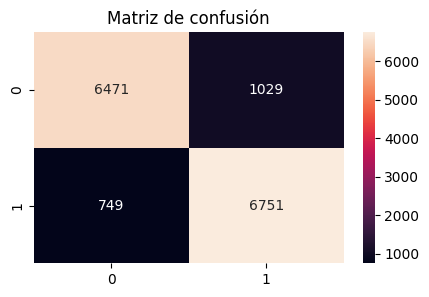

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de confusión')
plt.show()

Trazar la matriz de confusión proporciona información sobre la cantidad de puntos de datos que el modelo clasifica de forma correcta e incorrecta.

De un total de 7500 comentarios negativos, 6551 se clasificaron correctamente como negativos y 949 se clasificaron incorrectamente como positivos. Asimismo, de 7500 reseñas positivas, 6714 se clasificaron correctamente como positivas y 786 se clasificaron incorrectamente como negativas.

**Ponte a prueba 1**

**Objetivo:**  
Dado un conjunto de datos con opiniones de usuarios sobre productos, entrenar un modelo de clasificación para predecir el sentimiento de cada opinión como "positiva", "negativa" o "neutral".

**Conjunto de datos:**  
El conjunto de datos proporcionado, llamado `opiniones.csv`, contiene las siguientes columnas:

1. `id`: Identificador único de la opinión.
2. `comentario`: Texto de la opinión escrita por el usuario.
3. `sentimiento`: Clasificación del sentimiento de la opinión como "positiva", "negativa" o "neutral".

Puedes descargar el conjunto de datos en el siguiente enlace: https://drive.google.com/file/d/1qSVW33xd1mNQOEZkhYhfQgf0n8zT4dqO/view?usp=sharing

**Puntos a considerar:**  
1. Se debe dividir el conjunto de datos en datos de entrenamiento y prueba.
2. Utilizar técnicas de procesamiento de lenguaje natural para transformar el texto en características numéricas.
3. Entrenar un modelo de clasificación (puede ser un modelo de regresión logística, máquinas de soporte vectorial, entre otros) usando los datos de entrenamiento.
4. Evaluar el desempeño del modelo utilizando los datos de prueba.
5. Presentar métricas de desempeño como precisión, recall y F1-score.

# Reto semanal

Realiza un modelo de clasificación de reviews negativos y positivos con el siguiente dataset: https://osf.io/tyue9/

- Descarga el archivo CSV.
- Realiza limpieza de datos si es necesario.
- Crea una nube de palabras.
- Clasifica las reseñas en positivas y negativas.
- Genera un modelo de predicción con los datos que tienes.
- Escribe un review para probar la funcionalidad de tu modelo.


## Mis próximos pasos
Recuerda practicar de manera constante todo lo aprendido en este camino de aprendizaje. Anota las dudas que surjan y compártelas con tu *coach* el día de la clase.

¡Vas por un excelente camino!